##Load The Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import gzip

# Set the file path
file_path = "/content/drive/MyDrive/Memetracker/2008-12_MemeTracker_Sentiment_Analysis.xlsx" #here instead of this filepath use your directory path

# Open the file using gzip and read it into a pandas dataframe
with gzip.open(file_path, 'rb') as f:
    df = pd.read_csv(f, sep='\t', header=None)

UnicodeDecodeError: ignored

In [ ]:
df.shape

(72441611, 2)

##Subset the Dataset

In [ ]:
#subsetting to t a million
df1 = df[:500000]
df1.head(20)
df1.shape

(500000, 2)

##Text-preprocessing

In [ ]:
#Since there were some non IPv6 format urls, we have to create a block around this error
def parse_url(url):
    try:
        return urlparse(url).hostname
    except ValueError:
        return None

In [ ]:
#Allika-Sneha Donation
#to extract dommain name
(df1[df1[0]=="P"][1]).apply(str)

from urllib.parse import urlparse
links=("P","L")
df1.loc[df1[0].isin(links),1] = (df1.loc[df1[0].isin(links),1]).apply(parse_url)
# converts urls to domain name but keeps all other like ww1, ww3, etc.

<ipython-input-7-cae8b90bc718>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[df1[0].isin(links),1] = (df1.loc[df1[0].isin(links),1]).apply(parse_url)


In [ ]:
df1[0].value_counts()

L    271436
Q    106686
P     60939
T     60939
Name: 0, dtype: int64

In [ ]:
df1.head(20)

,0,1
0,P,eighteezbaby.com
1,T,2009-01-01 00:00:50
2,P,thelondonreviewer.com
3,T,2009-01-01 00:01:10
4,Q,not only do they patients get to lose their lo...
5,L,entertainment.timesonline.co.uk
6,P,thelondonreviewer.com
7,T,2009-01-01 00:01:10
8,L,imdb.com
9,L,imdb.com


In [ ]:
#to remove all the Ps that does not have Q extractions
indices= df1.loc[df1[0]=="P"].index
indices = indices.tolist()

length = len(df1)-2
bad_P = list()
p_count = 0
for i in indices:
  if((df1.iloc[i][0]=="P") & (df1.iloc[i+2][0]=="Q")):
    continue
  else:
    bad_P.append(i)
# finds all the bad Ps i.e. all the Ps with no Q

for i in bad_P :
  #print(temp_df.iloc[i])
  #print(temp_df.iloc[indices[indices.index(i)+1]])
  df1 = df1.drop(index=range(i,indices[indices.index(i)+1]))

#removes all the data related to bad Ps

IndexError: ignored

In [ ]:
df1.head(20)

,0,1
2,P,thelondonreviewer.com
3,T,2009-01-01 00:01:10
4,Q,not only do they patients get to lose their lo...
5,L,entertainment.timesonline.co.uk
11,P,thelondonreviewer.com
12,T,2009-01-01 00:01:10
13,Q,plus patiently answering all my questions abou...
14,L,thelondonreviewer.com
15,P,blog.myspace.com
16,T,2009-01-01 00:01:34


##Sentiment Analysis

In [ ]:
#loading required packages: NLP
#!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and non-alphanumeric characters
    text = re.sub(r'\W', ' ', text)

    # Remove single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    return tokens

In [ ]:
#text pre-processing the Qs
for i, row in df1.iterrows():
  if row[0] == 'Q':
    df1.at[i,1] = preprocess_text(df1.at[i,1])


print(i)

499999


In [ ]:
#lets check the values
col2_values = df1[df1[0] == 'Q'][1]
col2_values

4         [patients, get, lose, love, handles, chubby, b...
13        [plus, patiently, answering, questions, produc...
17        [alone, wake, morning, alone, sick, solve, dif...
20                       [looked, like, happy, great, time]
21                    [actually, low, key, would, expected]
                                ...                        
492135                        [jusqu, au, dernier, souffle]
492136                        [jusqu, au, dernier, souffle]
492139    [eran, muy, talentosos, cnicamente, pero, tamb...
492140    [el, que, realmente, contuvo, mi, respiraci, c...
492141    [cuando, tuvimos, esa, generaci, dorada, de, v...
Name: 1, Length: 106686, dtype: object

In [ ]:
from textblob import TextBlob

#function to return sentiment value
def get_sentiment(text_list):
  sentiment_sum = 0
  for text in text_list:
    blob = TextBlob(text)
    sentiment_sum += blob.sentiment.polarity
  if len(text_list) != 0 :
    return sentiment_sum/len(text_list)
  else :
    return 0

In [ ]:
#let us create a new column with the sentiment value
for i, row in df1.iterrows():
  if row[0] == 'Q':
    df1.at[i,2] = get_sentiment(df1.at[i,1])


print(i)
df1.head(20)

499999


,0,1,2
2,P,thelondonreviewer.com,NaN
3,T,2009-01-01 00:01:10,NaN
4,Q,"[patients, get, lose, love, handles, chubby, b...",0.041667
5,L,entertainment.timesonline.co.uk,NaN
11,P,thelondonreviewer.com,NaN
12,T,2009-01-01 00:01:10,NaN
13,Q,"[plus, patiently, answering, questions, produc...",0.000000
14,L,thelondonreviewer.com,NaN
15,P,blog.myspace.com,NaN
16,T,2009-01-01 00:01:34,NaN


In [ ]:
df1 = df1.rename(columns={0: "value", 1: "extract", 2: "sent_value"})
df1.head(20)

,value,extract,sent_value
2,P,thelondonreviewer.com,NaN
3,T,2009-01-01 00:01:10,NaN
4,Q,"[patients, get, lose, love, handles, chubby, b...",0.041667
5,L,entertainment.timesonline.co.uk,NaN
11,P,thelondonreviewer.com,NaN
12,T,2009-01-01 00:01:10,NaN
13,Q,"[plus, patiently, answering, questions, produc...",0.000000
14,L,thelondonreviewer.com,NaN
15,P,blog.myspace.com,NaN
16,T,2009-01-01 00:01:34,NaN


In [ ]:
col23_values = df1[df1["value"] == 'Q'][["extract","sent_value"]]
col23_values

,extract,sent_value
4,"[patients, get, lose, love, handles, chubby, b...",0.041667
13,"[plus, patiently, answering, questions, produc...",0.000000
17,"[alone, wake, morning, alone, sick, solve, dif...",0.040260
20,"[looked, like, happy, great, time]",0.320000
21,"[actually, low, key, would, expected]",-0.020000
...,...,...
492135,"[jusqu, au, dernier, souffle]",0.000000
492136,"[jusqu, au, dernier, souffle]",0.000000
492139,"[eran, muy, talentosos, cnicamente, pero, tamb...",0.000000
492140,"[el, que, realmente, contuvo, mi, respiraci, c...",0.000000


In [ ]:
#assiging polarity to each Q
#let us create a new column with the sentiment value
for i, row in df1.iterrows():
  if row[0] == 'Q':
    if df1.loc[i,"sent_value"] >0:
      df1.at[i,"sentiment"] = "+ve"
    elif df1.loc[i,"sent_value"] <0:
      df1.at[i,"sentiment"] = "-ve"
    else:
      df1.loc[i,"sentiment"] = '='


print(i)

249758


In [ ]:
#col23_values = df1[df1["value"] == 'Q'][["extract","sentiment"]]
#col23_values.head(30)
df1["sentiment"].value_counts()

=      56633
+ve    36161
-ve    13892
Name: sentiment, dtype: int64

##Export the File

In [ ]:
#exporting the file
df1.to_excel('output.xlsx', index=False)

##Import excel file

In [ ]:
import pandas as pd
df_8 = pd.read_excel('/content/drive/MyDrive/Memetracker/2008_08_MemeTracker_Sentiment_Analysis.xlsx')

In [ ]:

df_10 = pd.read_excel('/content/drive/MyDrive/Memetracker/2008_10_MemeTraxker_Sentiment_Analysis.xlsx')

In [ ]:

df_12 = pd.read_excel('/content/drive/MyDrive/Memetracker/2008-12_MemeTracker_Sentiment_Analysis.xlsx')

##Histogram


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def gethist(data):
# Assuming df2 is your DataFrame and 'sent_value' is your sentiment score column.
  sentiment_values = data['sent_value']

# Create a color map
  cmap = plt.get_cmap('RdYlGn')

# Define the number of bins
  num_bins = 30

# Bin the data
  bins = np.linspace(sentiment_values.min(), sentiment_values.max(), num_bins)
  indices = np.digitize(sentiment_values, bins)

  fig = plt.figure(figsize=(10,6), facecolor='black')
  ax = fig.add_subplot(1, 1, 1)
  ax.set_facecolor('black') # here is where you set the background of plot

  for i in range(num_bins):
    # Find which data points fall into this bin
    in_bin = sentiment_values[indices == i]
    # Plot this bin in the correct color
    plt.hist(in_bin, bins=bins, alpha=1, color=cmap(i / num_bins))

  plt.title('Frequency vs Sentiment Value', color='white')
  plt.xlabel('Sentiment Value', color='white')
  plt.ylabel('Frequency', color='white')
  plt.grid(True, alpha =0.2, color='white')

  # Change the color of the ticks to white
  plt.tick_params(colors='white')

  # Limit the y-axis
  plt.ylim(0, 10000)

  return plt


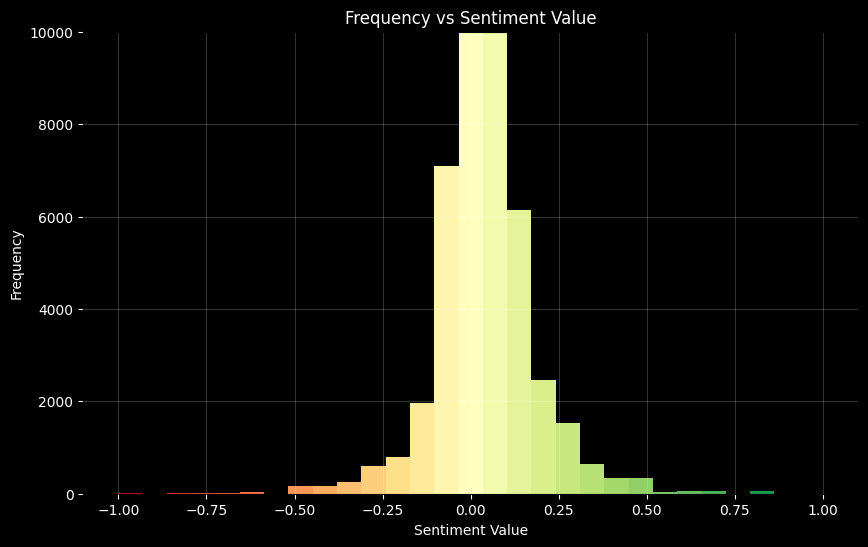

In [ ]:
# for 2008-08
plot = gethist(df_8)
plot.show()

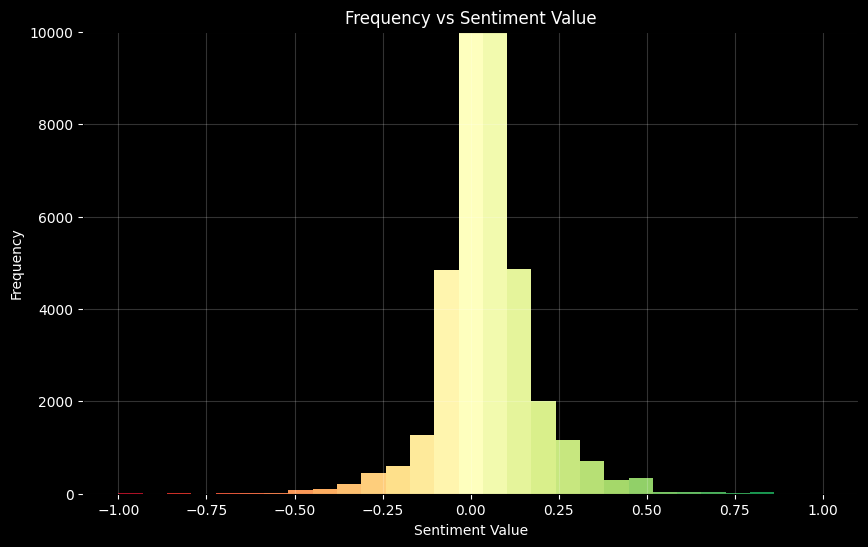

In [ ]:
# for 2008-10
plot = gethist(df_10)
plot.show()

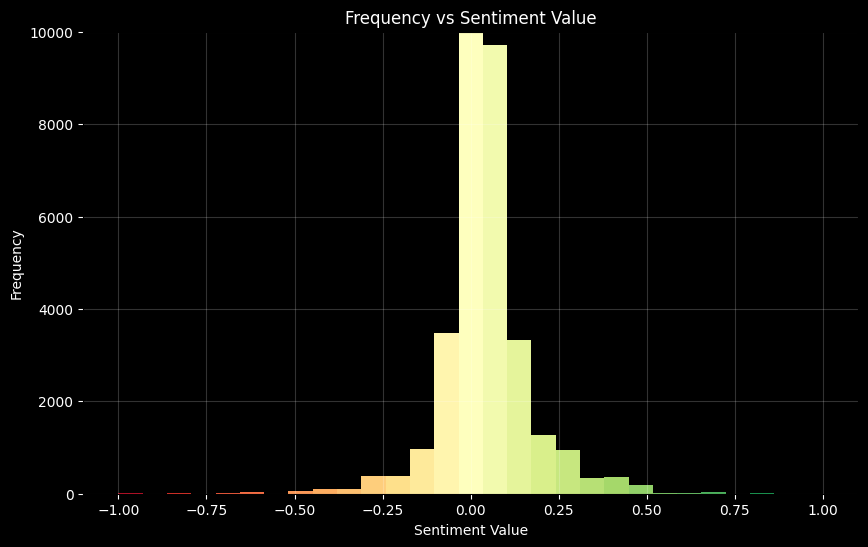

In [ ]:
# for 2008-12
plot = gethist(df_12)
plot.show()

##Analysing for any correlation

In [ ]:
df_8['extract'] = df_8['extract'].astype(str)

In [ ]:
extract_8 = df_8['extract']
df_8_extract = pd.DataFrame(extract_8, columns=['extract'])
df_8_extract.head()

,extract
0,codeproject.com
1,2008-08-01 00:00:00
2,"['create', 'property', 'binding', 'visual', 'w..."
3,"['videoplayer', 'silverlight', 'controls', 'vi..."
4,"['videoplayer', 'controls', 'videoplayer', 'vi..."


In [ ]:
extract_8_split = df_8_extract['extract'].apply(lambda x:x.split(','))
df_8_extract_split = pd.DataFrame(extract_8_split, columns=['extract'])
df_8_extract_split.head()

,extract
0,[codeproject.com]
1,[2008-08-01 00:00:00]
2,"[['create', 'property', 'binding', 'visual'..."
3,"[['videoplayer', 'silverlight', 'controls', ..."
4,"[['videoplayer', 'controls', 'videoplayer', ..."


In [ ]:
df_8['count'] = df_8_extract_split['extract'].apply(lambda x:len(x))
df_8

,value,extract,sent_value,sentiment,count
0,P,codeproject.com,NaN,NaN,1
1,T,2008-08-01 00:00:00,NaN,NaN,1
2,Q,"['create', 'property', 'binding', 'visual', 'w...",0.0,=,7
3,Q,"['videoplayer', 'silverlight', 'controls', 'vi...",0.0,=,16
4,Q,"['videoplayer', 'controls', 'videoplayer', 'vi...",0.0,=,5
...,...,...,...,...,...
304582,Q,"['holly', 'golightly', 'meets', 'salvador', 'd...",0.0,=,5
304583,Q,"['rings', 'glory']",0.0,=,2
304584,Q,"['grammy', 'consideration']",0.0,=,2
304585,L,televisionaryblog.com,NaN,NaN,1


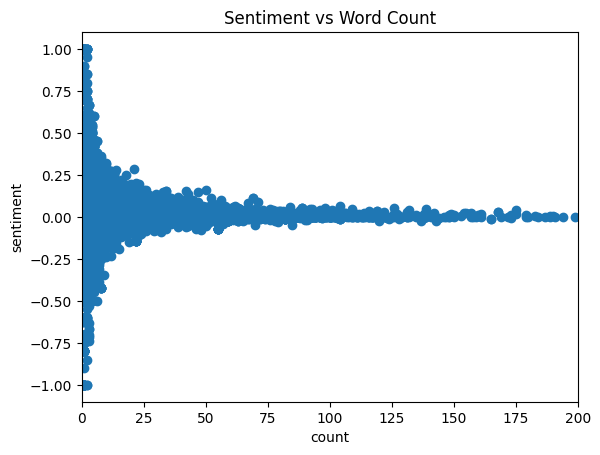

In [ ]:
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter( df_8['count'], df_8['sent_value'])

# Add labels and title
plt.xlabel('count')
plt.ylabel('sentiment')
plt.title('Sentiment vs Word Count')
plt.xlim(0,200)

# Display the plot
plt.show()

In [ ]:
df_10['extract'] = df_10['extract'].astype(str)

In [ ]:
extract_10 = df_10['extract']
df_10_extract = pd.DataFrame(extract_10, columns=['extract'])
df_10_extract.head()

In [ ]:
extract_10_split = df_10_extract['extract'].apply(lambda x:x.split(','))
df_10_extract_split = pd.DataFrame(extract_10_split, columns=['extract'])
df_10_extract_split.head()

In [ ]:
df_10['count'] = df_10_extract_split['extract'].apply(lambda x:len(x))
df_10

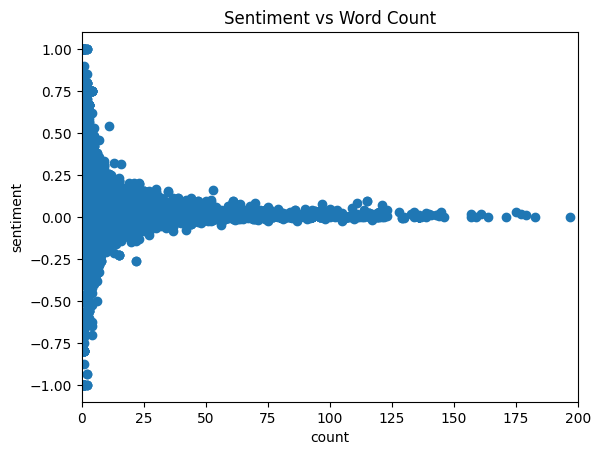

In [ ]:
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter( df_10['count'], df_10['sent_value'])

# Add labels and title
plt.xlabel('count')
plt.ylabel('sentiment')
plt.title('Sentiment vs Word Count')
plt.xlim(0,200)

# Display the plot
plt.show()

In [ ]:
df_12['extract'] = df_12['extract'].astype(str)

In [ ]:
extract_12 = df_12['extract']
df_12_extract = pd.DataFrame(extract_12, columns=['extract'])
df_12_extract.head()

In [ ]:
extract_12_split = df_12_extract['extract'].apply(lambda x:x.split(','))
df_12_extract_split = pd.DataFrame(extract_12_split, columns=['extract'])
df_12_extract_split.head()

In [ ]:
df_12['count'] = df_12_extract_split['extract'].apply(lambda x:len(x))
df_12

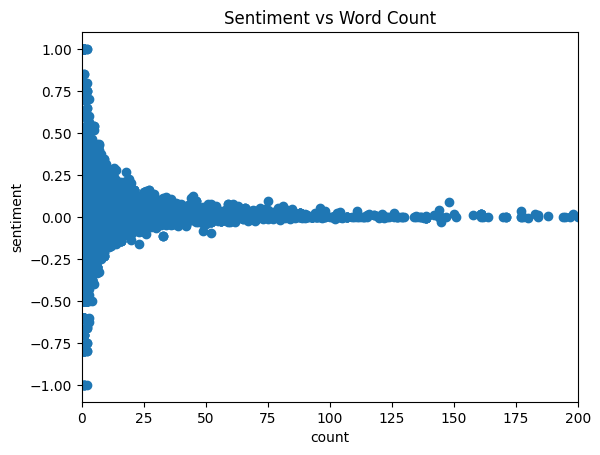

In [ ]:
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter( df_12['count'], df_12['sent_value'])

# Add labels and title
plt.xlabel('count')
plt.ylabel('sentiment')
plt.title('Sentiment vs Word Count')
plt.xlim(0,200)

# Display the plot
plt.show()

##Word cloud of domains for top positive and negative words

In [ ]:
def extract_domain_sent(data):
  p_sent = list()
  first_it = True
  for index, row in data.iterrows():
    if row['value'] == 'P':
      if not first_it:
        p_sent.append([extract, sent_sum/q_count])
      extract = row['extract']
      sent_sum = 0
      q_count = 0
      first_it = False
    if row['value'] == 'Q':
      sent_sum += row['sent_value']
      q_count += 1

  domain_sent_df = pd.DataFrame(p_sent, columns=['extract', 'sentiment_val'])
  return domain_sent_df

In [ ]:
domain_sent_df_8 = extract_domain_sent(df_8)
domain_sent_df_10 = extract_domain_sent(df_10)
domain_sent_df_12 = extract_domain_sent(df_12)

In [ ]:
# function to return the top 500 positive and negative extracts
def pos_neg(data, asc):
  data = data.sort_values('sentiment_val', ascending=asc)
  result = data.iloc[:500,:]
  return result

In [ ]:
top_pos_8 = pos_neg(domain_sent_df_8, False)
top_neg_8 = pos_neg(domain_sent_df_8, True)
top_pos_10 = pos_neg(domain_sent_df_10, False)
top_neg_10 = pos_neg(domain_sent_df_10, True)
top_pos_12 = pos_neg(domain_sent_df_12, False)
top_neg_12 = pos_neg(domain_sent_df_12, True)

In [ ]:
#common positive domain over 8, 10 and 12 months
common_pos_8_10 = pd.merge(top_pos_8,top_pos_10, on='extract', how='inner')
common_pos_8_10_12 = pd.merge(common_pos_8_10,top_pos_12, on='extract', how='inner')
domains_pos = common_pos_8_10_12['extract'].unique()

In [ ]:
#common negative domains over 8, 10 and 12 months
common_neg_8_10 = pd.merge(top_neg_8,top_neg_10, on='extract', how='inner')
common_neg_8_10_12 = pd.merge(common_neg_8_10,top_neg_12, on='extract', how='inner')
domains_neg = common_neg_8_10_12['extract'].unique()

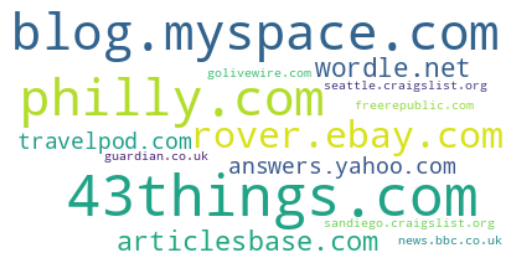

In [ ]:
# wordcloud for positive domains
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text_pos = ' '.join(domains_pos.astype(str))
wordcloud = WordCloud(background_color="white", regexp=r'\w[\w\.]+').generate(text_pos)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

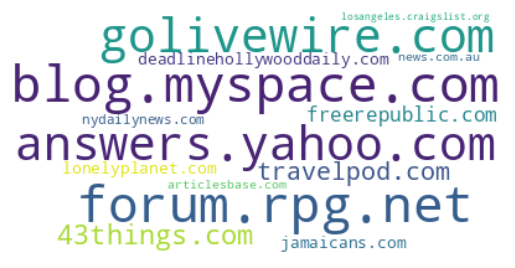

In [ ]:
# wordcloud for negative domains
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text_neg = ' '.join(domains_neg.astype(str))
wordcloud = WordCloud(background_color="white", regexp=r'\w[\w\.]+').generate(text_neg)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()